In [185]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
df = pd.read_csv("top10s.csv")


In [199]:

df.columns = ["ID","title","artist","top_genre",
              "year","bpm","nrgy","dnce","dB",
              "live","val","dur","acous","spch","pop"]


df.head()

,ID,title,artist,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [188]:
df.describe()

,ID,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
ID           603 non-null int64
title        603 non-null object
artist       603 non-null object
top_genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(12), object(3)
memory usage: 70.7+ KB


In [190]:
#The genres must be numerically encoded to avoid errors of 
#string data mixed iwth other numerical column data.

encode = LabelEncoder()
encode.fit(df['top_genre'])
df['top_genre'] = encode.transform(df['top_genre'])


In [191]:
features = df.drop(["ID","title","artist"],axis=1)

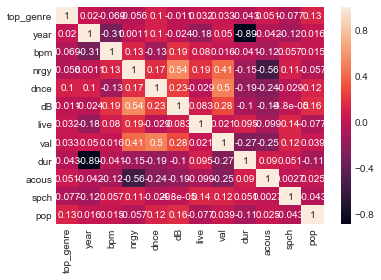

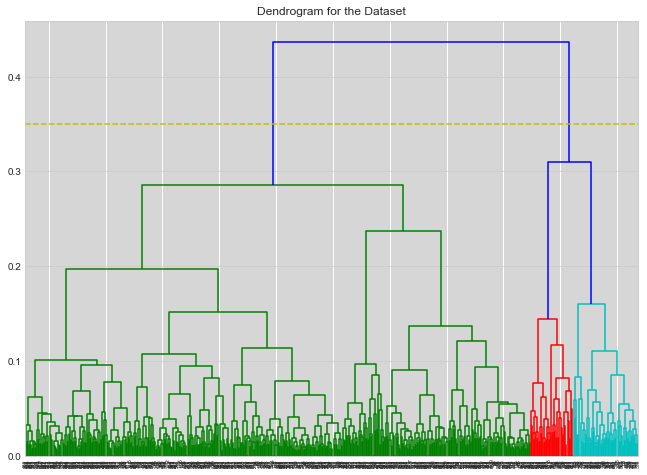

In [192]:
#The column data must all be normalized so that bias
#will not affect the clustering algorithm.

dfImprove = normalize(features)
dfImprove = pd.DataFrame(dfImprove, columns=features.columns)

sns.heatmap(dfImprove.corr(), annot = True)
plt.show()
print(" ")
print(" ")
print(" ")
print(" ")

#The dendrogram will be drawn next.
plt.figure(figsize=(11,8))
plt.title("Dendrogram for the Dataset")
graph = shc.dendrogram(shc.linkage(dfImprove,method="ward"))
plt.axhline(y=0.35, color="y", linestyle="--")

In [193]:
dfImprove.describe()

,top_genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,0.012645,0.989599,0.058225,0.034635,0.031625,-0.002740,0.008730,0.025657,0.110337,0.007035,0.004105,0.032674
std,0.005403,0.002081,0.012144,0.008022,0.006573,0.001377,0.006431,0.011063,0.016541,0.010195,0.003673,0.007124
min,0.000000,0.974364,0.000000,0.000000,0.000000,-0.029561,0.000000,0.000000,0.066110,0.000000,0.000000,0.000000
25%,0.012214,0.988653,0.049177,0.029955,0.028019,-0.002956,0.004423,0.017187,0.099285,0.000980,0.001966,0.029490
50%,0.012283,0.989895,0.058985,0.036319,0.032420,-0.002460,0.005911,0.025596,0.108427,0.002943,0.002464,0.033920
75%,0.012316,0.990892,0.063342,0.040306,0.035978,-0.001969,0.011807,0.033960,0.117642,0.008351,0.004434,0.037415
max,0.024088,0.994118,0.101027,0.048344,0.047579,-0.000983,0.036364,0.048080,0.205231,0.048363,0.023543,0.048599


In [194]:
hierarchical_algorithm = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
hierarchical_algorithm.fit_predict(dfImprove)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [195]:
dfImprove['hierarchical_algorithm'] = hierarchical_algorithm.fit_predict(dfImprove)

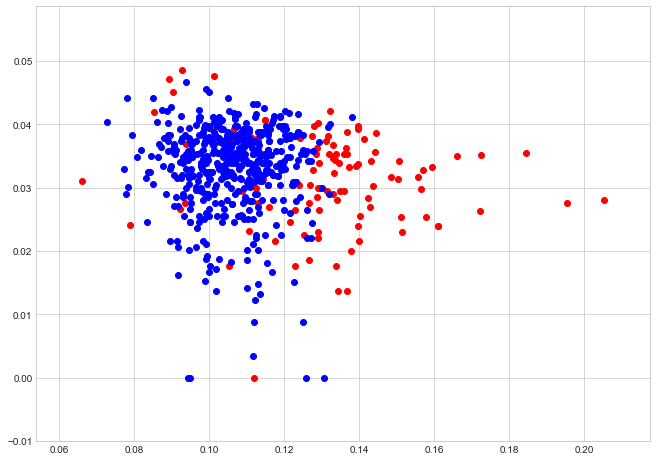

In [196]:
plt.figure(figsize=(11,8))

train1 = dfImprove[dfImprove.hierarchical_algorithm==0]
train2 = dfImprove[dfImprove.hierarchical_algorithm==1]


plt.scatter(train1.dur,train1["pop"],color="red")
plt.scatter(train2.dur,train2["pop"],color="blue")

In [197]:
##############DETECTING OUTLIERS##############

print("First Training Set")

print(" ")

print("train1 X")
print(train1.dur.describe())

print(" ")

print("train1 Y")
print(train1['pop'].describe())

devx = 0.022338
devy = 0.007702


x1 = []
y1 = []


for item in train1.dur:
    if ((item / devx) > 3):
        x1.append(item)

        
        
for item in train1['pop']:
    if ((item / devy) > 3):
        y1.append(item)
        

print (x1)
print (len(x1))
print (y1)
print (len(y1))




print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")


print("Second Training Set")

print(" ")

print("train2 X")
print(train2.dur.describe())

print(" ")

print("train2 Y")
print(train1['pop'].describe())

devx = 0.010786
devy = 0.007702


x1 = []
y1 = []


for item in train1.dur:
    if ((item / devx) > 3):
        x1.append(item)

        
        
for item in train1['pop']:
    if ((item / devy) > 3):
        y1.append(item)
        

print (x1)
print (len(x1))
print (y1)
print (len(y1))

First Training Set
 
train1 X
count    106.000000
mean       0.130943
std        0.022338
min        0.066110
25%        0.121966
50%        0.132178
75%        0.139984
max        0.205231
Name: dur, dtype: float64
 
train1 Y
count    106.000000
mean       0.031214
std        0.007702
min        0.000000
25%        0.026674
50%        0.031550
75%        0.036246
max        0.048599
Name: pop, dtype: float64
[0.1291561752094713, 0.14452013183741808, 0.10651660684369808, 0.13206122726683364, 0.1507224550275276, 0.13460723736645094, 0.13930951479202325, 0.12694912034655936, 0.12958155941452124, 0.13421864595076138, 0.12659436521817619, 0.16106924016689736, 0.1397883030147172, 0.1396783125695394, 0.13108896450245675, 0.18443069136549514, 0.12862926259022636, 0.13969054328299327, 0.1292085829183667, 0.15701708850376728, 0.1503432338428271, 0.13479457178875917, 0.1287590707551434, 0.1216596884169209, 0.160991680428746, 0.12535493077176466, 0.13686753658320333, 0.13678955745390778, 0.135917